# DAT210x - Programming with Python for DS

## Module4- Lab3

This code is intentionally missing! Read the directions on the course lab page!

In [24]:
%matplotlib notebook

In [25]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn import preprocessing

In [26]:
# Look pretty...

# matplotlib.style.use('ggplot')
plt.style.use('ggplot')

In [27]:
def scaleFeaturesDF(df):
    # Feature scaling is a type of transformation that only changes the
    # scale, but not number of features. Because of this, we can still
    # use the original dataset's column names... so long as we keep in
    # mind that the _units_ have been altered:

    scaled = preprocessing.StandardScaler().fit_transform(df)
    scaled = pd.DataFrame(scaled, columns=df.columns)
    
    print("New Variances:\n", scaled.var())
    print("New Describe:\n", scaled.describe())
    return scaled

In [28]:
def drawVectors(transformed_features, components_, columns, plt, scaled):
    if not scaled:
        return plt.axes() # No cheating ;-)

    num_columns = len(columns)

    # This funtion will project your *original* feature (columns)
    # onto your principal component feature-space, so that you can
    # visualize how "important" each one was in the
    # multi-dimensional scaling

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])
    yvector = components_[1] * max(transformed_features[:,1])

    ## visualize projections

    # Sort each column by it's length. These are your *original*
    # columns, not the principal components.
    important_features = { columns[i] : math.sqrt(xvector[i]**2 + yvector[i]**2) for i in range(num_columns) }
    important_features = sorted(zip(important_features.values(), important_features.keys()), reverse=True)
    print("Features by importance:\n", important_features)

    ax = plt.axes()

    for i in range(num_columns):
        # Use an arrow to project each original feature as a
        # labeled vector on your principal component axes
        plt.arrow(0, 0, xvector[i], yvector[i], color='b', width=0.0005, head_width=0.02, alpha=0.75)
        plt.text(xvector[i]*1.2, yvector[i]*1.2, list(columns)[i], color='b', alpha=0.75)

    return ax

In [29]:
# Do * NOT * alter this line, until instructed!
scaleFeatures = True

In [41]:
df=pd.read_csv("Datasets/kidney_disease.csv")
df.dropna(axis=0, how='any',inplace=True)
df.reset_index(drop=True,inplace=True)
df1=df

In [31]:
labels = ['red' if i=='ckd' else 'green' for i in df.classification]

In [32]:
df.drop(labels=['id', 'classification','rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane'],axis=1,inplace=True)
df.dtypes

age     float64
bp      float64
sg      float64
al      float64
su      float64
bgr     float64
bu      float64
sc      float64
sod     float64
pot     float64
hemo    float64
pcv      object
wc       object
rc       object
dtype: object

In [33]:
df.pcv=pd.to_numeric(df.pcv,errors='raise')
df.wc=pd.to_numeric(df.wc,errors='raise')
df.rc=pd.to_numeric(df.rc,errors='raise')
df

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9
1,53.0,90.0,1.020,2.0,0.0,70.0,107.0,7.2,114.0,3.7,9.5,29,12100,3.7
2,63.0,70.0,1.010,3.0,0.0,380.0,60.0,2.7,131.0,4.2,10.8,32,4500,3.8
3,68.0,80.0,1.010,3.0,2.0,157.0,90.0,4.1,130.0,6.4,5.6,16,11000,2.6
4,61.0,80.0,1.015,2.0,0.0,173.0,148.0,3.9,135.0,5.2,7.7,24,9200,3.2
5,48.0,80.0,1.025,4.0,0.0,95.0,163.0,7.7,136.0,3.8,9.8,32,6900,3.4
6,69.0,70.0,1.010,3.0,4.0,264.0,87.0,2.7,130.0,4.0,12.5,37,9600,4.1
7,73.0,70.0,1.005,0.0,0.0,70.0,32.0,0.9,125.0,4.0,10.0,29,18900,3.5
8,73.0,80.0,1.020,2.0,0.0,253.0,142.0,4.6,138.0,5.8,10.5,33,7200,4.3
9,46.0,60.0,1.010,1.0,0.0,163.0,92.0,3.3,141.0,4.0,9.8,28,14600,3.2


In [34]:
df.dtypes

age     float64
bp      float64
sg      float64
al      float64
su      float64
bgr     float64
bu      float64
sc      float64
sod     float64
pot     float64
hemo    float64
pcv       int64
wc        int64
rc      float64
dtype: object

In [35]:
# .. your (possible) code adjustment here ..
if scaleFeatures: 
    df = scaleFeaturesDF(df)
df

New Variances:
 age     1.006369
bp      1.006369
sg      1.006369
al      1.006369
su      1.006369
bgr     1.006369
bu      1.006369
sc      1.006369
sod     1.006369
pot     1.006369
hemo    1.006369
pcv     1.006369
wc      1.006369
rc      1.006369
dtype: float64
New Describe:
                 age            bp            sg            al            su  \
count  1.580000e+02  1.580000e+02  1.580000e+02  1.580000e+02  1.580000e+02   
mean   8.432074e-17  5.846238e-16 -1.304161e-15 -1.349132e-16 -2.248553e-17   
std    1.003180e+00  1.003180e+00  1.003180e+00  1.003180e+00  1.003180e+00   
min   -2.817246e+00 -2.158952e+00 -2.713365e+00 -5.661221e-01 -3.122333e-01   
25%   -6.669624e-01 -1.261282e+00  2.309247e-02 -5.661221e-01 -3.122333e-01   
50%    6.057713e-02  5.340564e-01  2.309247e-02 -5.661221e-01 -3.122333e-01   
75%    6.749439e-01  5.340564e-01  9.352451e-01  1.437770e-01 -3.122333e-01   
max    2.162358e+00  3.227064e+00  9.352451e-01  2.273474e+00  5.854375e+00   

    

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,-0.101098,-0.363613,-2.713365,2.273474,-0.312233,-0.221549,0.072474,0.525250,-3.730148,-0.616596,-0.865744,-1.092705,-0.569768,-0.976025
1,0.222253,1.431726,0.023092,0.853676,-0.312233,-0.947597,1.151950,1.633514,-3.328309,-0.270309,-1.457446,-1.423236,1.162684,-1.172850
2,0.868954,-0.363613,-1.801213,1.563575,-0.312233,3.841231,0.157139,0.166693,-1.051224,-0.126022,-1.004968,-1.092705,-1.275582,-1.074438
3,1.192305,0.534056,-1.801213,1.563575,2.154410,0.396364,0.792125,0.623038,-1.185170,0.508838,-2.814879,-2.855537,0.809777,-2.255385
4,0.739614,0.534056,-0.889060,0.853676,-0.312233,0.643529,2.019764,0.557846,-0.515439,0.162550,-2.083954,-1.974121,0.232293,-1.664911
5,-0.101098,0.534056,0.935245,2.273474,-0.312233,-0.561402,2.337256,1.796494,-0.381492,-0.241451,-1.353028,-1.092705,-0.505603,-1.468087
6,1.256975,-0.363613,-1.801213,1.563575,4.621053,2.049282,0.728626,0.166693,-1.185170,-0.183737,-0.413266,-0.541820,0.360623,-0.779201
7,1.515656,-0.363613,-2.713365,-0.566122,-0.312233,-0.947597,-0.435514,-0.420035,-1.854901,-0.183737,-1.283416,-1.423236,3.344290,-1.369675
8,1.515656,0.534056,0.023092,0.853676,-0.312233,1.879356,1.892766,0.786018,-0.113600,0.335694,-1.109386,-0.982528,-0.409356,-0.582376
9,-0.230439,-1.261282,-1.801213,0.143777,-0.312233,0.489051,0.834457,0.362270,0.288239,-0.183737,-1.353028,-1.533413,1.964745,-1.664911


In [36]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(df)
T=pca.transform(df)

In [37]:
len(df.columns.values)

14

Features by importance:
 [(3.433627889616103, 'bgr'), (3.2338069321880454, 'sc'), (3.186288965558514, 'bu'), (3.1226215240866466, 'su'), (3.07560290356944, 'pcv'), (3.0629485189629198, 'hemo'), (3.00259239563645, 'al'), (2.7990468891736593, 'sg'), (2.7327769657650536, 'rc'), (2.423868178808101, 'sod'), (2.2365062694668967, 'age'), (2.14705830374744, 'wc'), (1.7017683320956674, 'bp'), (1.0563823537406827, 'pot')]


<IPython.core.display.Javascript object>


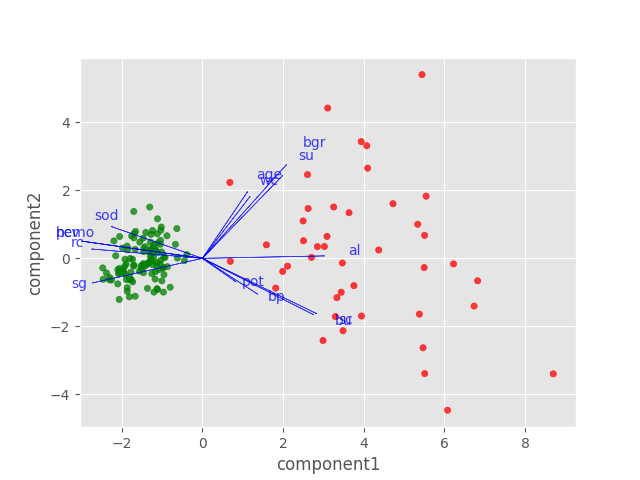

In [38]:
# Since we transformed via PCA, we no longer have column names; but we know we
# are in `principal-component` space, so we'll just define the coordinates accordingly:
ax = drawVectors(T, pca.components_, df.columns.values, plt, scaleFeatures)
T  = pd.DataFrame(T)

T.columns = ['component1', 'component2']
T.plot.scatter(x='component1', y='component2', marker='o', c=labels, alpha=0.75, ax=ax)

plt.show()

In [44]:
temp=pd.get_dummies(df1)
temp.drop(labels=['id'],axis=1,inplace=True)

In [45]:
temp.dtypes


age                      float64
bp                       float64
sg                       float64
al                       float64
su                       float64
bgr                      float64
bu                       float64
sc                       float64
sod                      float64
pot                      float64
hemo                     float64
rbc_abnormal               uint8
rbc_normal                 uint8
pc_abnormal                uint8
pc_normal                  uint8
pcc_notpresent             uint8
pcc_present                uint8
ba_notpresent              uint8
ba_present                 uint8
pcv_16                     uint8
pcv_20                     uint8
pcv_22                     uint8
pcv_23                     uint8
pcv_24                     uint8
pcv_25                     uint8
pcv_26                     uint8
pcv_28                     uint8
pcv_29                     uint8
pcv_30                     uint8
pcv_31                     uint8
          

In [46]:
if scaleFeatures: 
    temp = scaleFeaturesDF(temp)

New Variances:
 age                      1.006369
bp                       1.006369
sg                       1.006369
al                       1.006369
su                       1.006369
bgr                      1.006369
bu                       1.006369
sc                       1.006369
sod                      1.006369
pot                      1.006369
hemo                     1.006369
rbc_abnormal             1.006369
rbc_normal               1.006369
pc_abnormal              1.006369
pc_normal                1.006369
pcc_notpresent           1.006369
pcc_present              1.006369
ba_notpresent            1.006369
ba_present               1.006369
pcv_16                   1.006369
pcv_20                   1.006369
pcv_22                   1.006369
pcv_23                   1.006369
pcv_24                   1.006369
pcv_25                   1.006369
pcv_26                   1.006369
pcv_28                   1.006369
pcv_29                   1.006369
pcv_30                   1.00636

In [47]:
pca.fit(temp)
T=pca.transform(temp)

Features by importance:
 [(2.92032768796703, 'ane_no'), (2.9203276879670295, 'ane_yes'), (2.5758435727974476, 'classification_notckd'), (2.5758435727974476, 'classification_ckd'), (2.571928565004794, 'dm_yes'), (2.571928565004793, 'dm_no'), (2.49072166988355, 'bgr'), (2.4424574379707895, 'hemo'), (2.425713862921362, 'al'), (2.4033028716039557, 'cad_no'), (2.4033028716039553, 'cad_yes'), (2.3950362525267717, 'htn_no'), (2.3950362525267708, 'htn_yes'), (2.353774201847167, 'sc'), (2.342199511439751, 'bu'), (2.3190470012842272, 'appet_poor'), (2.3190470012842272, 'appet_good'), (2.2852761268006216, 'pc_normal'), (2.2852761268006216, 'pc_abnormal'), (2.2737827535980557, 'su'), (2.230725266327305, 'sg'), (2.1701504846340764, 'pcv_22'), (2.0392315317810232, 'pe_yes'), (2.0392315317810232, 'pe_no'), (2.0275496062031095, 'rc_2.1'), (1.994619485887137, 'rbc_abnormal'), (1.9946194858871364, 'rbc_normal'), (1.9481517887932225, 'sod'), (1.8762602349760045, 'pcc_present'), (1.8762602349760034, 'pcc_

<IPython.core.display.Javascript object>


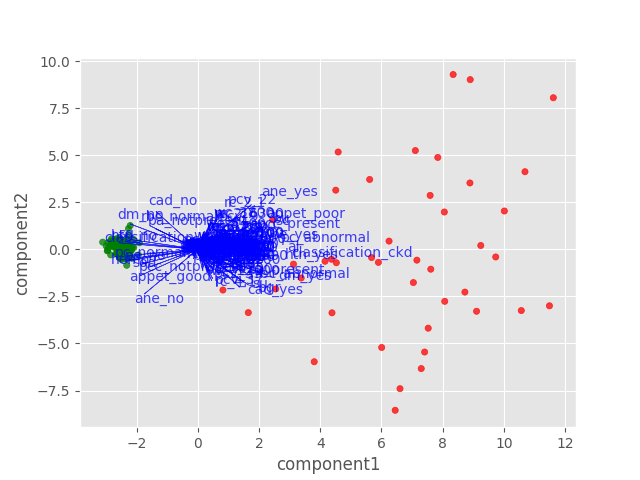

In [48]:
ax = drawVectors(T, pca.components_, temp.columns.values, plt, scaleFeatures)
T  = pd.DataFrame(T)

T.columns = ['component1', 'component2']
T.plot.scatter(x='component1', y='component2', marker='o', c=labels, alpha=0.75, ax=ax)

plt.show()